In [587]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [588]:
image = cv2.imread('image\sar_3.jpg')
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) 
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) 

(np.float64(-0.5), np.float64(224.5), np.float64(224.5), np.float64(-0.5))

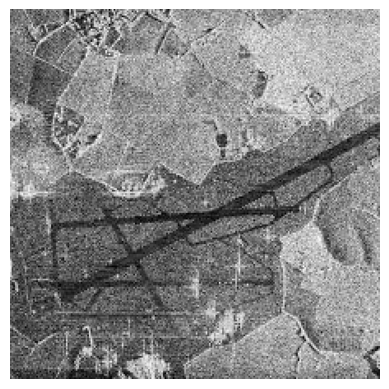

In [589]:
plt.imshow(image_gray, cmap="gray")
plt.axis('off')

(np.float64(-0.5), np.float64(224.5), np.float64(224.5), np.float64(-0.5))

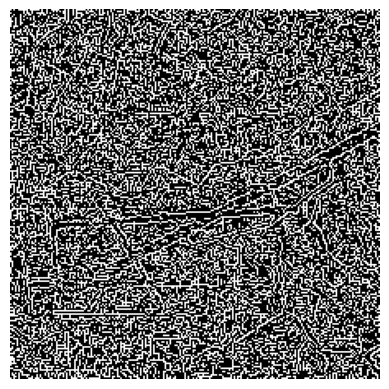

In [590]:
canny = cv2.Canny(image_gray, 50, 150, apertureSize=3)# убирает шумы смотрит градиент оставляет сильные перепады яркости Hysteresis Thresholding
#(делает чёрные и белые пиксели от значений)

plt.imshow(canny, cmap="gray")
plt.axis('off')

In [591]:
lines = cv2.HoughLines(canny, 1, np.pi / 80, 137)# линии делает
image_all_lines = image_rgb.copy()
image_longest_line = image_rgb.copy()

In [592]:
import math 

longest_line = None
max_length = 0

if lines is not None:
        for i in range(0, len(lines)):
            rho = lines[i][0][0]
            theta = lines[i][0][1]
            a = math.cos(theta)
            b = math.sin(theta)
            x0 = a * rho
            y0 = b * rho
            pt1 = (int(x0 + 1000*(-b)), int(y0 + 1000*(a)))
            pt2 = (int(x0 - 1000*(-b)), int(y0 - 1000*(a)))
            cv2.line(image_all_lines, pt1, pt2, (0,0,255), 3, cv2.LINE_AA)
            length = math.sqrt((pt2[0] - pt1[0])**2 + (pt2[1] - pt1[1])**2)
            if length > max_length:
                max_length = length
                longest_line = (pt1, pt2, rho, theta)

(np.float64(-0.5), np.float64(224.5), np.float64(224.5), np.float64(-0.5))

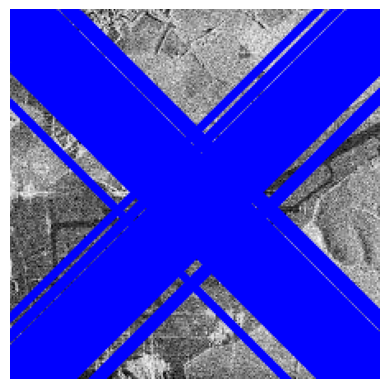

In [593]:
plt.imshow(image_all_lines)# не хочет оно на этом рисовать
plt.axis('off')

In [594]:
methods = {
    'Простая (127)': cv2.threshold(image_gray, 127, 255, cv2.THRESH_BINARY),
    'Простая (150)': cv2.threshold(image_gray, 150, 255, cv2.THRESH_BINARY),
    'Otsu': cv2.threshold(image_gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU),
    'Triangle': cv2.threshold(image_gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_TRIANGLE),
    'Адаптивная (Гаусс)': cv2.adaptiveThreshold(image_gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2),
    'Адаптивная (Средняя)': cv2.adaptiveThreshold(image_gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)
}

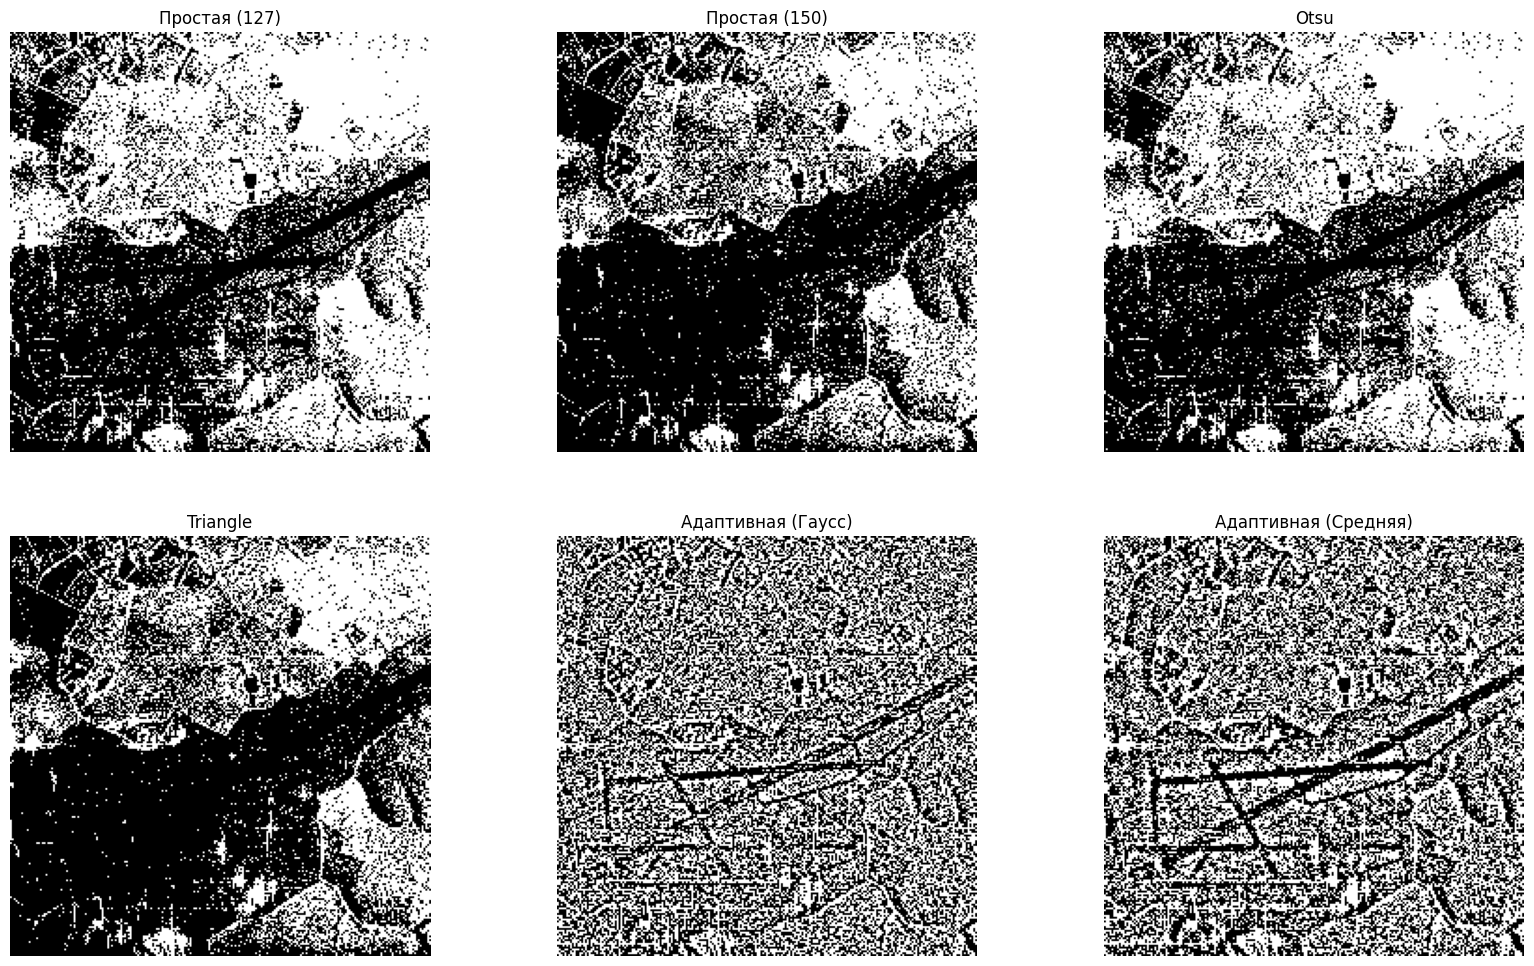

In [595]:
plt.figure(figsize=(20, 12))# куда будем картинки
for i, (name, result) in enumerate(methods.items()):
    plt.subplot(2, 3, i+1) # 2 строки 3 столба
    if name.startswith('Адаптивная'):
        binary_img = result
    else:
        binary_img = result[1]  # для обычных методов берем второе значение
        
    plt.imshow(binary_img, cmap='gray')
    plt.title(name)
    plt.axis('off')# убираем xy графики вокруг картинки

plt.show()

In [596]:
binary = methods['Otsu'][1]

In [597]:
kernel = np.ones((5, 5), np.uint8)# 5 на 5
cleaned = cv2.morphologyEx(binary, cv2.MORPH_OPEN, kernel)# убирает шумы
cleaned = cv2.morphologyEx(cleaned, cv2.MORPH_CLOSE, kernel)# убирает разрывы

In [598]:
contours, _ = cv2.findContours(cleaned, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE) # находим контуры 

In [599]:
largest_contour = max(contours, key=cv2.contourArea) # выбираем самый большой

In [600]:
if longest_line is not None:
    print(f"Длина самой длинной линии: {max_length:.2f} пикселей")

area = cv2.contourArea(largest_contour)
print(f"Площадь дорожной полосы: {area:.2f} пикселей")# - ну я хз, на картинке  img_1 всё работает на sar_3 так себе

Длина самой длинной линии: 1998.28 пикселей
Площадь дорожной полосы: 4891.00 пикселей
